In [42]:
import pandas as pd 
from translate import Translator


In [43]:
Translator = Translator(from_lang="nl", to_lang="en")

df = pd.read_csv('R_1_0_G_1_child_mortality.csv')
df_highschool = pd.read_csv('R_1_0_G_1_high_school.csv')

columns_translated = Translator.translate(', '.join(df.columns.tolist()))

print(columns_translated.split(', '))


df.columns = columns_translated.split(",")

df.head()

C:\Users\cleme\AppData\Local\Temp\ipykernel_10872\1641589255.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_highschool = pd.read_csv('R_1_0_G_1_high_school.csv')


['Unnamed: 0', 'geography', 'gender', 'migration background', 'household', 'parent_income_wealth_bins', 'outcome', 'N', 'mean', 'parents_income', 'education_parents', 'type']


,Unnamed: 0,geography,gender,migration background,household,parent_income_wealth_bins,outcome,N,mean,parents_income,education_parents,type
0,1,Nederland,Totaal,Totaal,Totaal,0% - 20%,c00_infant_mortality,299244,0.86,32.398,Totaal,5_income
1,2,Nederland,Totaal,Totaal,Totaal,20% - 40%,c00_infant_mortality,299244,0.66,58.385,Totaal,5_income
2,3,Nederland,Totaal,Totaal,Totaal,40% - 60%,c00_infant_mortality,299244,0.60,76.785,Totaal,5_income
3,4,Nederland,Totaal,Totaal,Totaal,60% - 80%,c00_infant_mortality,299244,0.54,98.013,Totaal,5_income
4,5,Nederland,Totaal,Totaal,Totaal,80% - 100%,c00_infant_mortality,299241,0.50,157.501,Totaal,5_income


0        32.398
1        58.385
2        76.785
3        98.013
4       157.501
         ...   
8207        NaN
8208        NaN
8209        NaN
8210        NaN
8211        NaN
Name:  parents_income, Length: 8212, dtype: float64


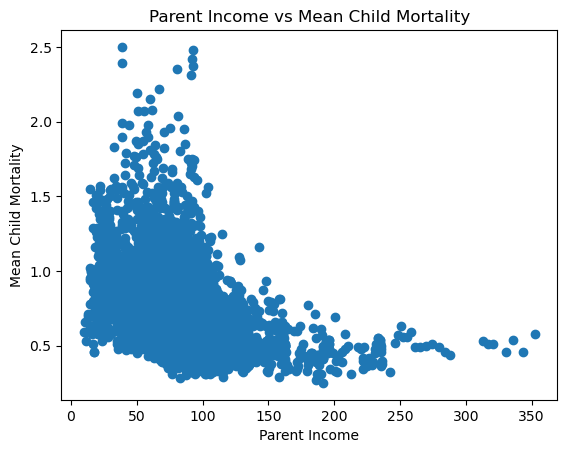

In [44]:
#graph parent income vs mean child mortality
import matplotlib.pyplot as plt
print(df[' parents_income'])
plt.scatter(df[' parents_income'], df[' mean'])
plt.xlabel('Parent Income')
plt.ylabel('Mean Child Mortality')
plt.title('Parent Income vs Mean Child Mortality')
plt.show()

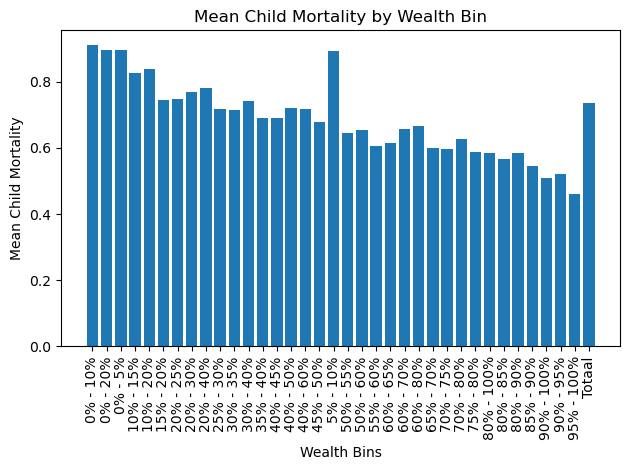

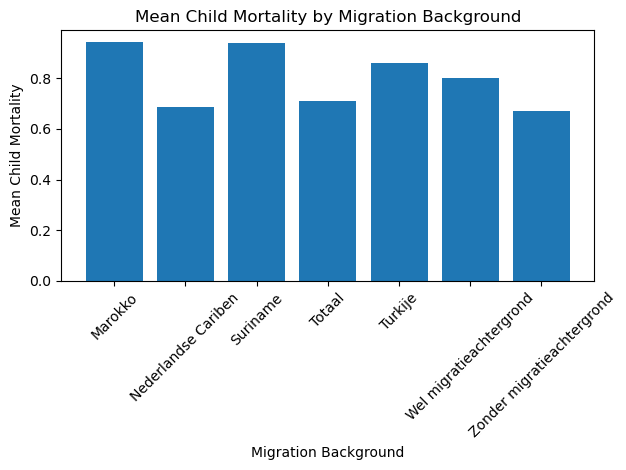

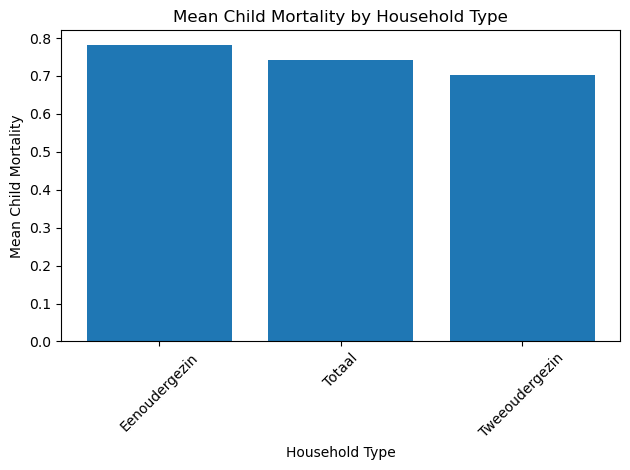

In [45]:
# -------- 1. Mean mortality by wealth bins --------
wealth_group = df.groupby(' parent_income_wealth_bins')[' mean'].mean().sort_index()

plt.figure()
plt.bar(wealth_group.index, wealth_group.values)
plt.xticks(rotation=90)
plt.xlabel("Wealth Bins")
plt.ylabel("Mean Child Mortality")
plt.title("Mean Child Mortality by Wealth Bin")
plt.tight_layout()
plt.show()

# -------- 2. Mean mortality by migration background --------
migration_group = df.groupby(' migration background')[' mean'].mean()

plt.figure()
plt.bar(migration_group.index, migration_group.values)
plt.xticks(rotation=45)
plt.xlabel("Migration Background")
plt.ylabel("Mean Child Mortality")
plt.title("Mean Child Mortality by Migration Background")
plt.tight_layout()
plt.show()

# -------- 3. Mean mortality by household type --------
household_group = df.groupby(' household')[' mean'].mean()

plt.figure()
plt.bar(household_group.index, household_group.values)
plt.xticks(rotation=45)
plt.xlabel("Household Type")
plt.ylabel("Mean Child Mortality")
plt.title("Mean Child Mortality by Household Type")
plt.tight_layout()
plt.show()

In [61]:
#exploration of the second dataset (used for the map)

df_map = pd.read_csv('R_1_0_M_1_c16_secondary_class_foreign_born_parents_income.csv')
print(df_map.columns.tolist())

amsterdam_data = df_map[df_map['gemeentenaam'] == 'Amsterdam']
pd.set_option('display.max_columns', None)
display(amsterdam_data.head(n=30))


C:\Users\cleme\AppData\Local\Temp\ipykernel_10872\505605264.py:3: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_map = pd.read_csv('R_1_0_M_1_c16_secondary_class_foreign_born_parents_income.csv')


['id', 'name', 'type', 'outcome', 'gemeentecode', 'gemeentenaam', 'all_all_all_all', 'all_all_all_two_parents', 'all_all_all_single_parent', 'all_all_morocco_all', 'all_all_morocco_two_parents', 'all_all_morocco_single_parent', 'all_all_native_all', 'all_all_native_two_parents', 'all_all_native_single_parent', 'all_all_antilles_all', 'all_all_antilles_two_parents', 'all_all_antilles_single_parent', 'all_all_other_all', 'all_all_other_two_parents', 'all_all_other_single_parent', 'all_all_surinam_all', 'all_all_surinam_two_parents', 'all_all_surinam_single_parent', 'all_all_turkey_all', 'all_all_turkey_two_parents', 'all_all_turkey_single_parent', 'all_male_all_all', 'all_male_all_two_parents', 'all_male_all_single_parent', 'all_male_morocco_all', 'all_male_morocco_two_parents', 'all_male_morocco_single_parent', 'all_male_native_all', 'all_male_native_two_parents', 'all_male_native_single_parent', 'all_male_antilles_all', 'all_male_antilles_two_parents', 'all_male_antilles_single_parent'

,id,name,type,outcome,gemeentecode,gemeentenaam,all_all_all_all,all_all_all_two_parents,all_all_all_single_parent,all_all_morocco_all,all_all_morocco_two_parents,all_all_morocco_single_parent,all_all_native_all,all_all_native_two_parents,all_all_native_single_parent,all_all_antilles_all,all_all_antilles_two_parents,all_all_antilles_single_parent,all_all_other_all,all_all_other_two_parents,all_all_other_single_parent,all_all_surinam_all,all_all_surinam_two_parents,all_all_surinam_single_parent,all_all_turkey_all,all_all_turkey_two_parents,all_all_turkey_single_parent,all_male_all_all,all_male_all_two_parents,all_male_all_single_parent,all_male_morocco_all,all_male_morocco_two_parents,all_male_morocco_single_parent,all_male_native_all,all_male_native_two_parents,all_male_native_single_parent,all_male_antilles_all,all_male_antilles_two_parents,all_male_antilles_single_parent,all_male_other_all,all_male_other_two_parents,all_male_other_single_parent,all_male_surinam_all,all_male_surinam_two_parents,all_male_surinam_single_parent,all_male_turkey_all,all_male_turkey_two_parents,all_male_turkey_single_parent,all_female_all_all,all_female_all_two_parents,all_female_all_single_parent,all_female_morocco_all,all_female_morocco_two_parents,all_female_morocco_single_parent,all_female_native_all,all_female_native_two_parents,all_female_native_single_parent,all_female_antilles_all,all_female_antilles_two_parents,all_female_antilles_single_parent,all_female_other_all,all_female_other_two_parents,all_female_other_single_parent,all_female_surinam_all,all_female_surinam_two_parents,all_female_surinam_single_parent,all_female_turkey_all,all_female_turkey_two_parents,all_female_turkey_single_parent,low_all_all_all,low_all_all_two_parents,low_all_all_single_parent,low_all_morocco_all,low_all_morocco_two_parents,low_all_morocco_single_parent,low_all_native_all,low_all_native_two_parents,low_all_native_single_parent,low_all_antilles_all,low_all_antilles_two_parents,low_all_antilles_single_parent,low_all_other_all,low_all_other_two_parents,low_all_other_single_parent,low_all_surinam_all,low_all_surinam_two_parents,low_all_surinam_single_parent,low_all_turkey_all,low_all_turkey_two_parents,low_all_turkey_single_parent,low_male_all_all,low_male_all_two_parents,low_male_all_single_parent,low_male_morocco_all,low_male_morocco_two_parents,low_male_morocco_single_parent,low_male_native_all,low_male_native_two_parents,low_male_native_single_parent,low_male_antilles_all,low_male_antilles_two_parents,low_male_antilles_single_parent,low_male_other_all,low_male_other_two_parents,low_male_other_single_parent,low_male_surinam_all,low_male_surinam_two_parents,low_male_surinam_single_parent,low_male_turkey_all,low_male_turkey_two_parents,low_male_turkey_single_parent,low_female_all_all,low_female_all_two_parents,low_female_all_single_parent,low_female_morocco_all,low_female_morocco_two_parents,low_female_morocco_single_parent,low_female_native_all,low_female_native_two_parents,low_female_native_single_parent,low_female_antilles_all,low_female_antilles_single_parent,low_female_other_all,low_female_other_two_parents,low_female_other_single_parent,low_female_surinam_all,low_female_surinam_two_parents,low_female_surinam_single_parent,low_female_turkey_all,low_female_turkey_two_parents,low_female_turkey_single_parent,mid_all_all_all,mid_all_all_two_parents,mid_all_all_single_parent,mid_all_morocco_all,mid_all_morocco_two_parents,mid_all_morocco_single_parent,mid_all_native_all,mid_all_native_two_parents,mid_all_native_single_parent,mid_all_antilles_all,mid_all_antilles_two_parents,mid_all_other_all,mid_all_other_two_parents,mid_all_other_single_parent,mid_all_surinam_all,mid_all_surinam_two_parents,mid_all_surinam_single_parent,mid_all_turkey_all,mid_all_turkey_two_parents,mid_all_turkey_single_parent,mid_male_all_all,mid_male_all_two_parents,mid_male_all_single_parent,mid_male_morocco_all,mid_male_morocco_two_parents,mid_male_morocco_single_parent,mid_male_native_all,mi

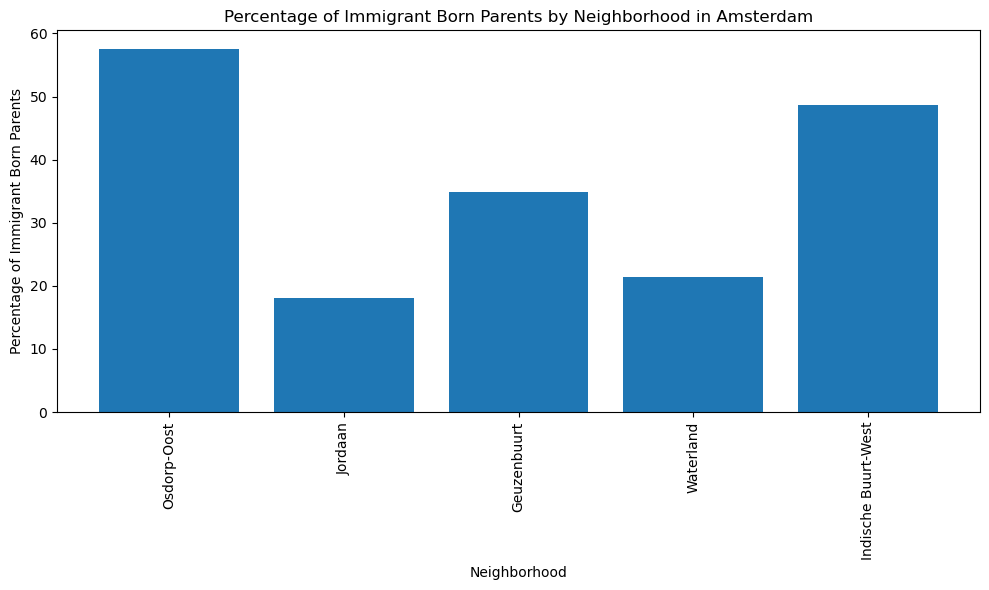

In [62]:
#percentageof immigrant born parents in class per neighborhood in amsterdam

#only view first 5 rows bro
amsterdam_data = amsterdam_data.head(n=5)


plt.figure(figsize=(10,6))
plt.bar(amsterdam_data['name'], amsterdam_data['all_all_all_all'])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Immigrant Born Parents")
plt.title("Percentage of Immigrant Born Parents by Neighborhood in Amsterdam")
plt.tight_layout()
plt.show()


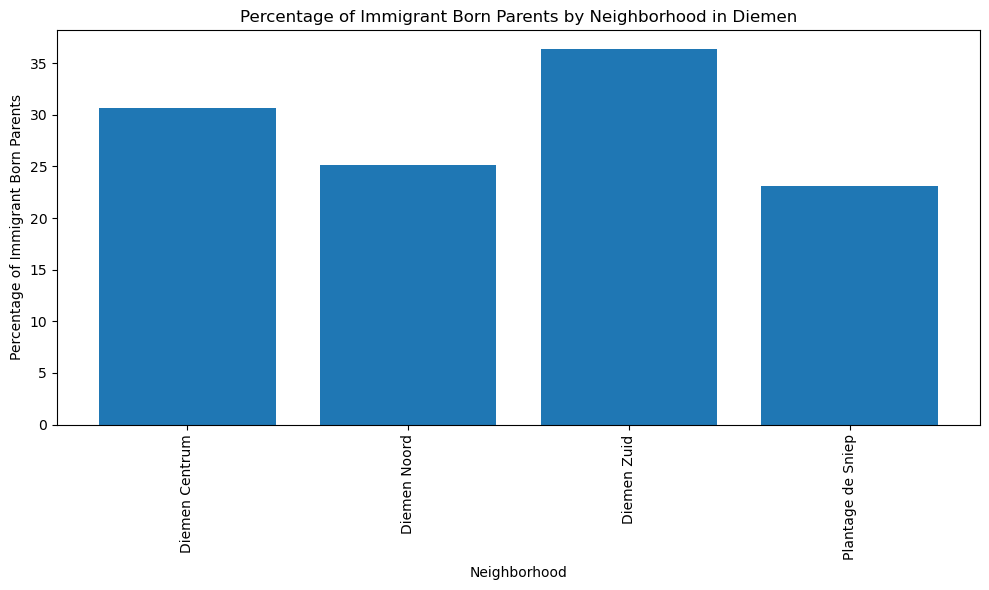

In [64]:
diemen_data = df_map[df_map['gemeentenaam'] == 'Diemen']

plt.figure(figsize=(10,6))
plt.bar(diemen_data['name'], diemen_data['all_all_all_all'])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Immigrant Born Parents")
plt.title("Percentage of Immigrant Born Parents by Neighborhood in Diemen")
plt.tight_layout()  
plt.show()


C:\Users\cleme\AppData\Local\Temp\ipykernel_10872\3617996253.py:3: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_income = pd.read_csv('R_1_0_M_1_c30_household_income_wealth.csv')


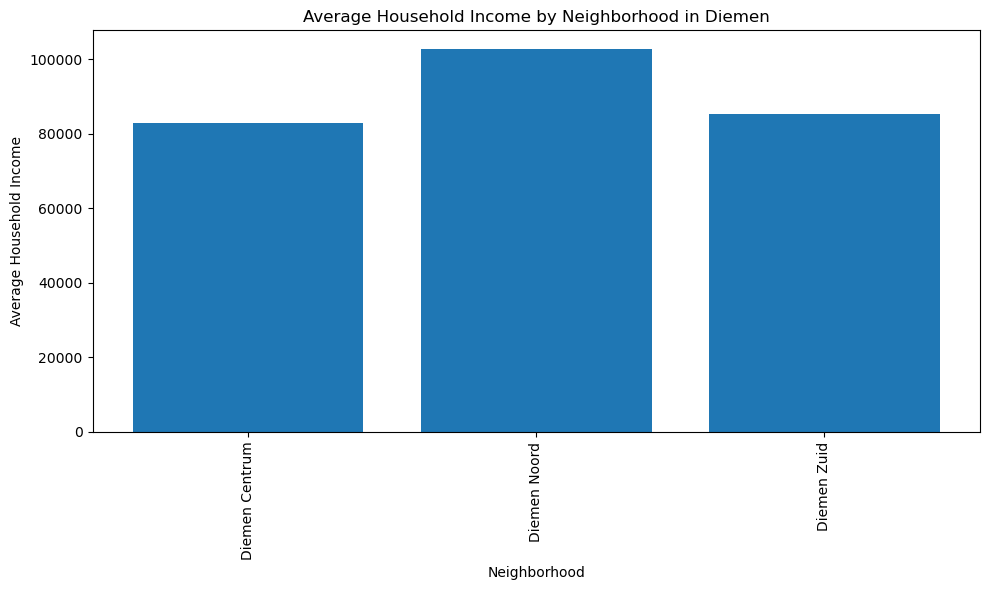

Diemen Noord income compared to the losers in the south: 102573.359 and 85296.502


In [68]:
#exploring income differences across neighborhoods in diemen

df_income = pd.read_csv('R_1_0_M_1_c30_household_income_wealth.csv')

df_income_diemen = df_income[df_income['gemeentenaam'] == 'Diemen']
plt.figure(figsize=(10,6))
plt.bar(df_income_diemen['name'], df_income_diemen['all_all_all_all'])
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Average Household Income")
plt.title("Average Household Income by Neighborhood in Diemen")
plt.tight_layout()
plt.show()

print(f'Diemen Noord income compared to the losers in the south: {df_income_diemen[df_income_diemen["name"] == "Diemen Noord"]["all_all_all_all"].values[0]} and {df_income_diemen[df_income_diemen["name"] == "Diemen Zuid"]["all_all_all_all"].values[0]}')